In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [7]:
X_train.shape

(60000, 784)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train = X_train.reshape(-1,784,1)
X_test = X_test.reshape(-1,784,1)

In [14]:
X_test.shape

(10000, 784, 1)

In [10]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [11]:
input_size = 784
output_size = 10
number_of_neurons = [ [200,200,300],
                      [400,200,300],
                      [500,200,200], 
                      [300,400,600],
                      [600,500,400] ]

In [12]:
idx = 0

number_neurons = []
accuracy_score = []

while idx < 5 :
    
    model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(784,1)),
                            tf.keras.layers.Dense(number_of_neurons[idx][0], activation='relu'),
                            tf.keras.layers.Dense(number_of_neurons[idx][1], activation='relu'),
                            tf.keras.layers.Dense(number_of_neurons[idx][2], activation='relu'),   
                            tf.keras.layers.Dense(output_size, activation='softmax')   
                            ]) 
    
    model.summary()
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    NUM_EPOCHS = 100

    model.fit(X_train,y_train, batch_size=10000, epochs = NUM_EPOCHS, validation_data=(X_test,y_test), verbose=0)
    
    y_predict = model.predict(X_test)
    
    y_pred = []
    
    for val in y_predict:
        y_pred.append(np.argmax(val))

    accuracy = metrics.accuracy_score(np.argmax(y_test,axis = 1) ,y_pred)
    recall = metrics.recall_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    precision = metrics.precision_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    f1_score = metrics.f1_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    cm = metrics.confusion_matrix(np.argmax(y_test,axis = 1) ,y_pred)
    print(cm)
    print("Accuracy:",accuracy)
    print("F1 score:",f1_score)
    print("Recall:",recall)
    print("Precision:",precision)
    print("\n\n\n")
    
    number_neurons.append(sum(number_of_neurons[idx]))
    accuracy_score.append(accuracy)
    
    idx = idx + 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 260,510
Trainable params: 260,510
Non-trainable params: 0
_________________________________________________________________
[[ 968    0    2    1    1    2    3    1    2    

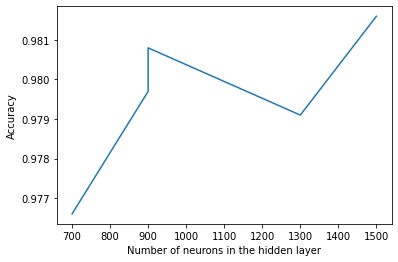

In [13]:
# Plot the graph of error vs learning rate
plt.plot(number_neurons, accuracy_score)
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.show()